## 라이브러리

In [30]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
import joblib
from datetime import date
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('final_clustered_df.csv')

In [4]:
df.dtypes

고객번호                 object
Recency               int64
Frequency             int64
Monetary            float64
성별                    int64
연령대                   int64
채널구분                  int64
product_code          int64
cluster_label         int64
Recency_log         float64
Frequency_log       float64
Monetary_log        float64
product_code_log    float64
성별_log              float64
연령대_log             float64
dtype: object

In [5]:
df.columns

Index(['고객번호', 'Recency', 'Frequency', 'Monetary', '성별', '연령대', '채널구분',
       'product_code', 'cluster_label', 'Recency_log', 'Frequency_log',
       'Monetary_log', 'product_code_log', '성별_log', '연령대_log'],
      dtype='object')

In [12]:
df_main = df[['Recency', 'Frequency', 'Monetary', '성별', '연령대', '채널구분',
       'product_code']]

In [13]:
label = df[['cluster_label']]

In [14]:
df_main_n = np.array(df_main)
label_n = np.array(label)

# 데이터 분리 / 모델 학습

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_main_n, label_n, test_size=0.4, random_state=156)
print(X_train.shape, X_test.shape)

(16150, 7) (10767, 7)


In [16]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [17]:
params = {'max_depth' : 3,
          'eta': 0.1,
          'objective':'multi:softmax',
          'num_class' : 4,
          'eval_metric':'mlogloss',
          'early_stopping':100
          }
num_rounds = 10000

In [18]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[16:37:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.25422	eval-mlogloss:1.25551
[1]	train-mlogloss:1.14459	eval-mlogloss:1.14690
[2]	train-mlogloss:1.05102	eval-mlogloss:1.05422
[3]	train-mlogloss:0.97077	eval-mlogloss:0.97478
[4]	train-mlogloss:0.89971	eval-mlogloss:0.90457
[5]	train-mlogloss:0.83637	eval-mlogloss:0.84185
[6]	train-mlogloss:0.78161	eval-mlogloss:0.78776
[7]	train-mlogloss:0.73115	eval-mlogloss:0.73779
[8]	train-mlogloss:0.68582	eval-mlogloss:0.69300
[9]	train-mlogloss:0.64420	eval-mlogloss:0.65154
[10]	train-mlogloss:0.60828	eval-mlogloss:0.61613
[11]	t

[154]	train-mlogloss:0.06446	eval-mlogloss:0.07885
[155]	train-mlogloss:0.06417	eval-mlogloss:0.07862
[156]	train-mlogloss:0.06378	eval-mlogloss:0.07828
[157]	train-mlogloss:0.06346	eval-mlogloss:0.07800
[158]	train-mlogloss:0.06313	eval-mlogloss:0.07772
[159]	train-mlogloss:0.06283	eval-mlogloss:0.07743
[160]	train-mlogloss:0.06254	eval-mlogloss:0.07717
[161]	train-mlogloss:0.06219	eval-mlogloss:0.07684
[162]	train-mlogloss:0.06185	eval-mlogloss:0.07656
[163]	train-mlogloss:0.06154	eval-mlogloss:0.07624
[164]	train-mlogloss:0.06120	eval-mlogloss:0.07594
[165]	train-mlogloss:0.06091	eval-mlogloss:0.07569
[166]	train-mlogloss:0.06066	eval-mlogloss:0.07544
[167]	train-mlogloss:0.06031	eval-mlogloss:0.07520
[168]	train-mlogloss:0.05999	eval-mlogloss:0.07494
[169]	train-mlogloss:0.05966	eval-mlogloss:0.07468
[170]	train-mlogloss:0.05937	eval-mlogloss:0.07442
[171]	train-mlogloss:0.05907	eval-mlogloss:0.07414
[172]	train-mlogloss:0.05880	eval-mlogloss:0.07392
[173]	train-mlogloss:0.05851	ev

[315]	train-mlogloss:0.03449	eval-mlogloss:0.05383
[316]	train-mlogloss:0.03440	eval-mlogloss:0.05379
[317]	train-mlogloss:0.03430	eval-mlogloss:0.05371
[318]	train-mlogloss:0.03421	eval-mlogloss:0.05363
[319]	train-mlogloss:0.03411	eval-mlogloss:0.05355
[320]	train-mlogloss:0.03402	eval-mlogloss:0.05349
[321]	train-mlogloss:0.03391	eval-mlogloss:0.05337
[322]	train-mlogloss:0.03383	eval-mlogloss:0.05332
[323]	train-mlogloss:0.03374	eval-mlogloss:0.05327
[324]	train-mlogloss:0.03363	eval-mlogloss:0.05317
[325]	train-mlogloss:0.03352	eval-mlogloss:0.05309
[326]	train-mlogloss:0.03340	eval-mlogloss:0.05304
[327]	train-mlogloss:0.03332	eval-mlogloss:0.05299
[328]	train-mlogloss:0.03322	eval-mlogloss:0.05296
[329]	train-mlogloss:0.03314	eval-mlogloss:0.05291
[330]	train-mlogloss:0.03303	eval-mlogloss:0.05280
[331]	train-mlogloss:0.03292	eval-mlogloss:0.05271
[332]	train-mlogloss:0.03284	eval-mlogloss:0.05262
[333]	train-mlogloss:0.03272	eval-mlogloss:0.05254
[334]	train-mlogloss:0.03262	ev

[476]	train-mlogloss:0.02276	eval-mlogloss:0.04509
[477]	train-mlogloss:0.02270	eval-mlogloss:0.04502
[478]	train-mlogloss:0.02264	eval-mlogloss:0.04498
[479]	train-mlogloss:0.02259	eval-mlogloss:0.04497
[480]	train-mlogloss:0.02254	eval-mlogloss:0.04494
[481]	train-mlogloss:0.02249	eval-mlogloss:0.04490
[482]	train-mlogloss:0.02244	eval-mlogloss:0.04485
[483]	train-mlogloss:0.02239	eval-mlogloss:0.04481
[484]	train-mlogloss:0.02235	eval-mlogloss:0.04479
[485]	train-mlogloss:0.02230	eval-mlogloss:0.04475
[486]	train-mlogloss:0.02224	eval-mlogloss:0.04471
[487]	train-mlogloss:0.02221	eval-mlogloss:0.04467
[488]	train-mlogloss:0.02216	eval-mlogloss:0.04466
[489]	train-mlogloss:0.02210	eval-mlogloss:0.04463
[490]	train-mlogloss:0.02205	eval-mlogloss:0.04459
[491]	train-mlogloss:0.02200	eval-mlogloss:0.04453
[492]	train-mlogloss:0.02196	eval-mlogloss:0.04450
[493]	train-mlogloss:0.02191	eval-mlogloss:0.04445
[494]	train-mlogloss:0.02186	eval-mlogloss:0.04442
[495]	train-mlogloss:0.02181	ev

[637]	train-mlogloss:0.01647	eval-mlogloss:0.04084
[638]	train-mlogloss:0.01645	eval-mlogloss:0.04083
[639]	train-mlogloss:0.01642	eval-mlogloss:0.04079
[640]	train-mlogloss:0.01639	eval-mlogloss:0.04077
[641]	train-mlogloss:0.01636	eval-mlogloss:0.04073
[642]	train-mlogloss:0.01633	eval-mlogloss:0.04073
[643]	train-mlogloss:0.01630	eval-mlogloss:0.04069
[644]	train-mlogloss:0.01627	eval-mlogloss:0.04068
[645]	train-mlogloss:0.01625	eval-mlogloss:0.04067
[646]	train-mlogloss:0.01621	eval-mlogloss:0.04062
[647]	train-mlogloss:0.01618	eval-mlogloss:0.04061
[648]	train-mlogloss:0.01615	eval-mlogloss:0.04059
[649]	train-mlogloss:0.01612	eval-mlogloss:0.04058
[650]	train-mlogloss:0.01609	eval-mlogloss:0.04058
[651]	train-mlogloss:0.01606	eval-mlogloss:0.04056
[652]	train-mlogloss:0.01603	eval-mlogloss:0.04053
[653]	train-mlogloss:0.01600	eval-mlogloss:0.04051
[654]	train-mlogloss:0.01597	eval-mlogloss:0.04050
[655]	train-mlogloss:0.01595	eval-mlogloss:0.04050
[656]	train-mlogloss:0.01593	ev

[798]	train-mlogloss:0.01266	eval-mlogloss:0.03858
[799]	train-mlogloss:0.01264	eval-mlogloss:0.03856
[800]	train-mlogloss:0.01262	eval-mlogloss:0.03858
[801]	train-mlogloss:0.01260	eval-mlogloss:0.03857
[802]	train-mlogloss:0.01258	eval-mlogloss:0.03854
[803]	train-mlogloss:0.01256	eval-mlogloss:0.03853
[804]	train-mlogloss:0.01254	eval-mlogloss:0.03853
[805]	train-mlogloss:0.01252	eval-mlogloss:0.03853
[806]	train-mlogloss:0.01249	eval-mlogloss:0.03851
[807]	train-mlogloss:0.01247	eval-mlogloss:0.03848
[808]	train-mlogloss:0.01245	eval-mlogloss:0.03848
[809]	train-mlogloss:0.01243	eval-mlogloss:0.03847
[810]	train-mlogloss:0.01241	eval-mlogloss:0.03848
[811]	train-mlogloss:0.01239	eval-mlogloss:0.03848
[812]	train-mlogloss:0.01237	eval-mlogloss:0.03845
[813]	train-mlogloss:0.01235	eval-mlogloss:0.03845
[814]	train-mlogloss:0.01234	eval-mlogloss:0.03844
[815]	train-mlogloss:0.01232	eval-mlogloss:0.03843
[816]	train-mlogloss:0.01230	eval-mlogloss:0.03842
[817]	train-mlogloss:0.01228	ev

[959]	train-mlogloss:0.00998	eval-mlogloss:0.03730
[960]	train-mlogloss:0.00997	eval-mlogloss:0.03730
[961]	train-mlogloss:0.00995	eval-mlogloss:0.03727
[962]	train-mlogloss:0.00994	eval-mlogloss:0.03727
[963]	train-mlogloss:0.00993	eval-mlogloss:0.03726
[964]	train-mlogloss:0.00991	eval-mlogloss:0.03726
[965]	train-mlogloss:0.00990	eval-mlogloss:0.03727
[966]	train-mlogloss:0.00989	eval-mlogloss:0.03726
[967]	train-mlogloss:0.00988	eval-mlogloss:0.03726
[968]	train-mlogloss:0.00986	eval-mlogloss:0.03725
[969]	train-mlogloss:0.00985	eval-mlogloss:0.03725
[970]	train-mlogloss:0.00983	eval-mlogloss:0.03724
[971]	train-mlogloss:0.00982	eval-mlogloss:0.03723
[972]	train-mlogloss:0.00981	eval-mlogloss:0.03722
[973]	train-mlogloss:0.00980	eval-mlogloss:0.03722
[974]	train-mlogloss:0.00978	eval-mlogloss:0.03720
[975]	train-mlogloss:0.00977	eval-mlogloss:0.03719
[976]	train-mlogloss:0.00976	eval-mlogloss:0.03721
[977]	train-mlogloss:0.00974	eval-mlogloss:0.03720
[978]	train-mlogloss:0.00973	ev

[1118]	train-mlogloss:0.00810	eval-mlogloss:0.03649
[1119]	train-mlogloss:0.00809	eval-mlogloss:0.03649
[1120]	train-mlogloss:0.00808	eval-mlogloss:0.03651
[1121]	train-mlogloss:0.00807	eval-mlogloss:0.03650
[1122]	train-mlogloss:0.00806	eval-mlogloss:0.03649
[1123]	train-mlogloss:0.00805	eval-mlogloss:0.03648
[1124]	train-mlogloss:0.00804	eval-mlogloss:0.03648
[1125]	train-mlogloss:0.00804	eval-mlogloss:0.03647
[1126]	train-mlogloss:0.00803	eval-mlogloss:0.03648
[1127]	train-mlogloss:0.00802	eval-mlogloss:0.03646
[1128]	train-mlogloss:0.00801	eval-mlogloss:0.03647
[1129]	train-mlogloss:0.00800	eval-mlogloss:0.03647
[1130]	train-mlogloss:0.00799	eval-mlogloss:0.03647
[1131]	train-mlogloss:0.00798	eval-mlogloss:0.03646
[1132]	train-mlogloss:0.00797	eval-mlogloss:0.03645
[1133]	train-mlogloss:0.00796	eval-mlogloss:0.03644
[1134]	train-mlogloss:0.00795	eval-mlogloss:0.03643
[1135]	train-mlogloss:0.00794	eval-mlogloss:0.03643
[1136]	train-mlogloss:0.00793	eval-mlogloss:0.03643
[1137]	train

[1276]	train-mlogloss:0.00671	eval-mlogloss:0.03598
[1277]	train-mlogloss:0.00670	eval-mlogloss:0.03597
[1278]	train-mlogloss:0.00669	eval-mlogloss:0.03597
[1279]	train-mlogloss:0.00668	eval-mlogloss:0.03597
[1280]	train-mlogloss:0.00668	eval-mlogloss:0.03597
[1281]	train-mlogloss:0.00667	eval-mlogloss:0.03597
[1282]	train-mlogloss:0.00666	eval-mlogloss:0.03597
[1283]	train-mlogloss:0.00665	eval-mlogloss:0.03597
[1284]	train-mlogloss:0.00665	eval-mlogloss:0.03597
[1285]	train-mlogloss:0.00664	eval-mlogloss:0.03596
[1286]	train-mlogloss:0.00663	eval-mlogloss:0.03595
[1287]	train-mlogloss:0.00662	eval-mlogloss:0.03594
[1288]	train-mlogloss:0.00662	eval-mlogloss:0.03595
[1289]	train-mlogloss:0.00661	eval-mlogloss:0.03594
[1290]	train-mlogloss:0.00660	eval-mlogloss:0.03594
[1291]	train-mlogloss:0.00659	eval-mlogloss:0.03593
[1292]	train-mlogloss:0.00659	eval-mlogloss:0.03593
[1293]	train-mlogloss:0.00658	eval-mlogloss:0.03591
[1294]	train-mlogloss:0.00657	eval-mlogloss:0.03591
[1295]	train

[1434]	train-mlogloss:0.00563	eval-mlogloss:0.03568
[1435]	train-mlogloss:0.00562	eval-mlogloss:0.03567
[1436]	train-mlogloss:0.00562	eval-mlogloss:0.03566
[1437]	train-mlogloss:0.00561	eval-mlogloss:0.03568
[1438]	train-mlogloss:0.00560	eval-mlogloss:0.03567
[1439]	train-mlogloss:0.00560	eval-mlogloss:0.03567
[1440]	train-mlogloss:0.00559	eval-mlogloss:0.03568
[1441]	train-mlogloss:0.00559	eval-mlogloss:0.03568
[1442]	train-mlogloss:0.00558	eval-mlogloss:0.03565
[1443]	train-mlogloss:0.00557	eval-mlogloss:0.03565
[1444]	train-mlogloss:0.00557	eval-mlogloss:0.03565
[1445]	train-mlogloss:0.00556	eval-mlogloss:0.03564
[1446]	train-mlogloss:0.00556	eval-mlogloss:0.03564
[1447]	train-mlogloss:0.00555	eval-mlogloss:0.03565
[1448]	train-mlogloss:0.00554	eval-mlogloss:0.03565
[1449]	train-mlogloss:0.00554	eval-mlogloss:0.03565
[1450]	train-mlogloss:0.00553	eval-mlogloss:0.03564
[1451]	train-mlogloss:0.00553	eval-mlogloss:0.03565
[1452]	train-mlogloss:0.00552	eval-mlogloss:0.03564
[1453]	train

[1592]	train-mlogloss:0.00478	eval-mlogloss:0.03544
[1593]	train-mlogloss:0.00478	eval-mlogloss:0.03544
[1594]	train-mlogloss:0.00477	eval-mlogloss:0.03545
[1595]	train-mlogloss:0.00476	eval-mlogloss:0.03544
[1596]	train-mlogloss:0.00476	eval-mlogloss:0.03544
[1597]	train-mlogloss:0.00475	eval-mlogloss:0.03545
[1598]	train-mlogloss:0.00475	eval-mlogloss:0.03546
[1599]	train-mlogloss:0.00475	eval-mlogloss:0.03544
[1600]	train-mlogloss:0.00474	eval-mlogloss:0.03544
[1601]	train-mlogloss:0.00473	eval-mlogloss:0.03544
[1602]	train-mlogloss:0.00473	eval-mlogloss:0.03545
[1603]	train-mlogloss:0.00473	eval-mlogloss:0.03544
[1604]	train-mlogloss:0.00472	eval-mlogloss:0.03543
[1605]	train-mlogloss:0.00472	eval-mlogloss:0.03544
[1606]	train-mlogloss:0.00471	eval-mlogloss:0.03544
[1607]	train-mlogloss:0.00471	eval-mlogloss:0.03543
[1608]	train-mlogloss:0.00471	eval-mlogloss:0.03543
[1609]	train-mlogloss:0.00470	eval-mlogloss:0.03543
[1610]	train-mlogloss:0.00470	eval-mlogloss:0.03543
[1611]	train

[1750]	train-mlogloss:0.00411	eval-mlogloss:0.03539
[1751]	train-mlogloss:0.00411	eval-mlogloss:0.03539
[1752]	train-mlogloss:0.00410	eval-mlogloss:0.03538
[1753]	train-mlogloss:0.00410	eval-mlogloss:0.03537
[1754]	train-mlogloss:0.00410	eval-mlogloss:0.03537
[1755]	train-mlogloss:0.00409	eval-mlogloss:0.03536
[1756]	train-mlogloss:0.00409	eval-mlogloss:0.03535
[1757]	train-mlogloss:0.00409	eval-mlogloss:0.03533
[1758]	train-mlogloss:0.00408	eval-mlogloss:0.03534
[1759]	train-mlogloss:0.00408	eval-mlogloss:0.03534
[1760]	train-mlogloss:0.00407	eval-mlogloss:0.03537
[1761]	train-mlogloss:0.00407	eval-mlogloss:0.03535
[1762]	train-mlogloss:0.00407	eval-mlogloss:0.03535
[1763]	train-mlogloss:0.00406	eval-mlogloss:0.03536
[1764]	train-mlogloss:0.00406	eval-mlogloss:0.03537
[1765]	train-mlogloss:0.00405	eval-mlogloss:0.03538
[1766]	train-mlogloss:0.00405	eval-mlogloss:0.03538
[1767]	train-mlogloss:0.00405	eval-mlogloss:0.03538
[1768]	train-mlogloss:0.00404	eval-mlogloss:0.03538
[1769]	train

In [19]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:100],3))

preds = []
for i in pred_probs :
    if i < 1 :
        preds.append(0)
        #preds = 0
    elif i >= 1 and i < 2 :
        preds.append(1)
        #preds = 1
    elif i >=2 and i < 3 :
        preds.append(2)
        #preds = 2
    else :
        preds.append(3)
        #preds = 3 
        
print(preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[2. 1. 3. 2. 3. 3. 2. 0. 0. 3. 3. 3. 1. 2. 2. 2. 2. 2. 0. 0. 0. 2. 2. 0.
 3. 3. 3. 2. 3. 0. 1. 2. 0. 3. 3. 3. 2. 1. 3. 3. 1. 3. 3. 0. 2. 0. 1. 0.
 2. 3. 3. 0. 2. 1. 3. 3. 2. 3. 1. 2. 2. 2. 3. 2. 3. 2. 1. 1. 3. 3. 3. 1.
 3. 2. 1. 0. 2. 3. 2. 2. 2. 3. 2. 0. 2. 2. 2. 0. 3. 2. 0. 1. 3. 3. 3. 3.
 3. 2. 3. 3.]
[2, 1, 3, 2, 3, 3, 2, 0, 0, 3]


In [20]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    F1 = f1_score(y_test, y_pred, average='macro')
    #AUC = roc_auc_score(y_test, y_pred, average = 'macro', multi_class="ovr")
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    #print('AUC: {:.4f}'.format(AUC))

In [21]:
get_clf_eval(y_test, preds)

오차행렬:
 [[1987    5    0    8]
 [   9 1796   26    0]
 [   0   15 3347   37]
 [  21    0   34 3482]]

정확도: 0.9856
정밀도: 0.9859
재현율: 0.9859
F1: 0.9859


In [22]:
joblib.dump(xgb_model, 'saved_model.pkl')

['saved_model.pkl']

## 기존 고객 분류하기

In [48]:
from datetime import datetime

def check_data():
    new_df = pd.DataFrame(columns=range(7))
    
    recency = int(input("최근 사용일자를 입력하세요 : "))
    frequency = int(input("고객 사용 빈도를 입력하세요 :"))
    monetary = int(input("고객 총 사용 금액을 입력하세요 :"))
    gender = input('고객 성별을 입력하세요 :')
    age = int(input('고객의 연령대를 입력하세요 : '))
    on_off = int(input('채널 구분을 입력하세요 : '))
    product_code = int(input('상품분류코드를 입력하세요 : '))
        
    new_df.loc[0] = [recency,frequency,monetary,gender,age,on_off,product_code]
    
    xgb_model = joblib.load('saved_model.pkl')
    new_df_n = np.array(new_df)
    dtest = xgb.DMatrix(new_df_n)
    pred_probs = xgb_model.predict(dtest)
    

    for i in pred_probs :
        if i < 1 :
            preds = 0
        elif i >= 1 and i < 2 :
            preds = 1
        elif i >=2 and i < 3 :
            preds = 2
        else :
            preds = 3

    print("%d번 클러스터에 속합니다.." %preds)
    return new_df

new_df = check_data()

최근 사용일자를 입력하세요 : 6
고객 사용 빈도를 입력하세요 :300
고객 총 사용 금액을 입력하세요 :9000
고객 성별을 입력하세요 :0
고객의 연령대를 입력하세요 : 20
채널 구분을 입력하세요 : 2
상품분류코드를 입력하세요 : 9
2번 클러스터에 속합니다..


In [23]:
xgb_model = joblib.load('saved_model.pkl')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

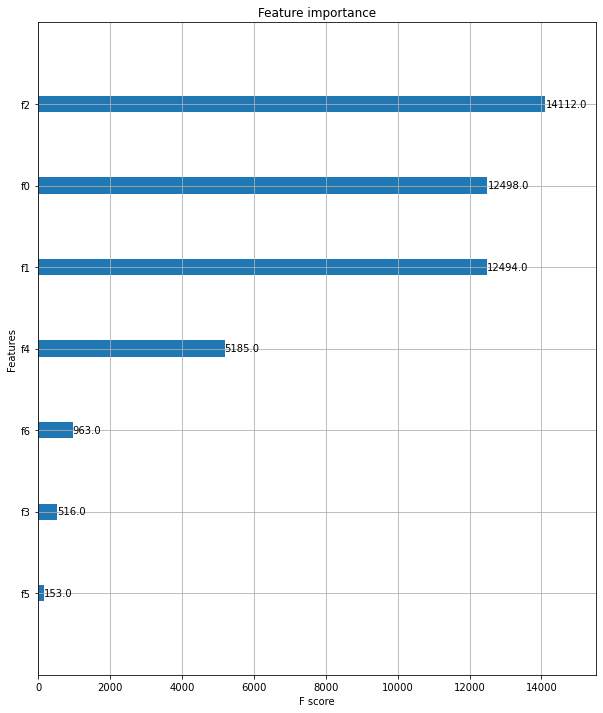

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax)